### IMPORTS ###

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Pasar a dataframe ###

In [ ]:
# Carreguem el csv en un DataFrame
csv_path = "titanic.csv"
df = pd.read_csv(csv_path)

### 1. Distribució edat passatgers ###

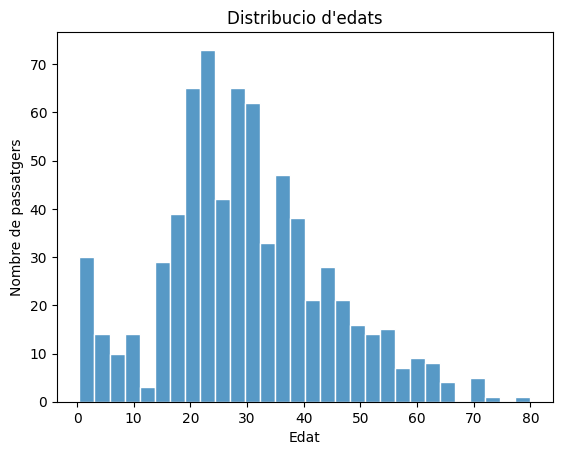

In [17]:
# Configurem la grafica
sns.histplot(data=df, x="Age", bins=30, color="#1f77b4", edgecolor="white")
# Editem les etiquetes i el titol del grafic
plt.xlabel("Edat")
plt.ylabel("Nombre de passatgers")
plt.title("Distribucio d'edats")
plt.show()

### 2. Mitja de preu ###

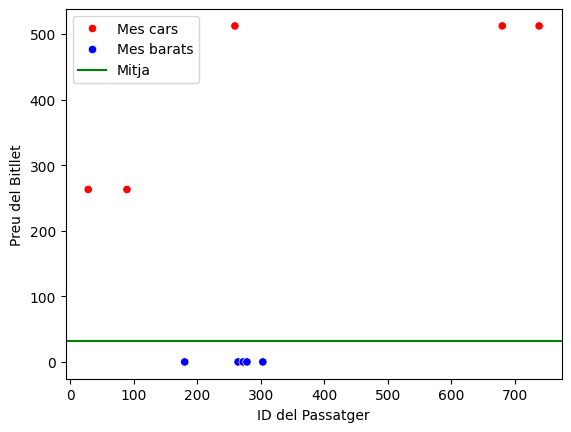

In [18]:
# Agafem els 5 bitllets mes cars i els 5 mes barats
cars = df.nlargest(5, "Fare").copy()
barats = df.nsmallest(5, "Fare").copy()

# Marquem el tipus de cada grup i els concatenem
cars["Tipus"] = "Mes cars"
barats["Tipus"] = "Mes barats"
extrems = pd.concat([cars, barats])

# Fem un grafic de dispersió amb colors per tipus de bitllet
sns.scatterplot(data=extrems, x="PassengerId", y="Fare", hue="Tipus", palette=["red", "blue"])
# Dibuixem una linea horitzontal amb la mitja del preu
mitja = df["Fare"].mean()
plt.axhline(mitja, color="green", label="Mitja")
# Fem la llegenda
plt.xlabel("ID del Passatger")
plt.ylabel("Preu del Bitllet")
plt.legend()
plt.show()

### 3. % Homes i dones supervivents ###

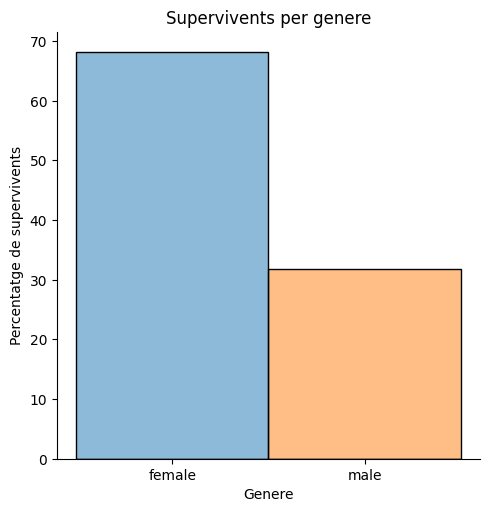

In [ ]:
# creem un DataFrame filtrant nomes els passatgers supervivents
df_surv = df[df["Survived"] == 1]

# Mostrem el percentatge de supervivents per genere
sns.displot(data=df_surv, x="Sex", hue="Sex", stat="percent", discrete=True, palette=["#1f77b4", "#ff7f0e"], legend=False)
plt.xlabel("Genere")
plt.ylabel("Percentatge de supervivents")
plt.title("Supervivents per genere")
plt.show()

### 4. Quadre estadistic, Preu mitja per classe ###

Aquesta grafica mostra com varia el preu del bitllet segons la classe, i el quadre estadistic ajuda a veure la distribucio per classe.

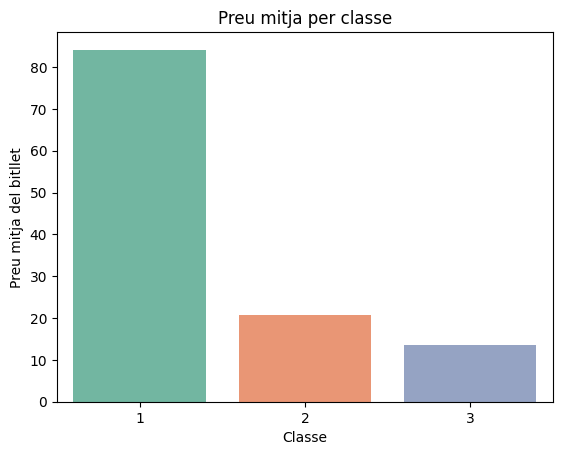

In [ ]:
# Agrupem per classe i calculem el preu del bitllet per classe
quadre = df.groupby("Pclass")["Fare"].describe()
quadre

# Fem un grafic de barras per mostrar la mitja del preu per classe
sns.barplot(data=df, x="Pclass", y="Fare", hue="Pclass", errorbar=None, palette="Set2", legend=False)
plt.xlabel("Classe")
plt.ylabel("Preu mitja del bitllet")
plt.title("Preu mitja per classe")
plt.show()